## Observables

### Magnetization  
$$
\langle M \rangle = \frac{1}{N}\sum^N_{\alpha}M(\alpha)
$$
$$
\langle |M| \rangle = \frac{1}{N}\sum^N_{\alpha}|M(\alpha)|
$$
$$
\langle M^2 \rangle = \frac{1}{N}\sum^N_{\alpha}M^2(\alpha)
$$

### Energy
$$
\langle E \rangle = \frac{1}{2} \langle \sum^N_i H_i \rangle
$$
$$
\langle E^2 \rangle = \frac{1}{2} \langle \sum^N_i H^2_i \rangle
$$

### Heat Capacity
$$
C_v = \frac{\partial E}{\partial T} = \frac{\langle E^2 \rangle - \langle E \rangle^2}{k_bT^2}
$$

### Susceptibility
$$
\chi = \frac{\partial M}{\partial T} = \frac{\langle M^2 \rangle - \langle M \rangle^2}{k_bT}
$$

In [1]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt

from math import *
from numpy.random import randint, random

In [2]:
## Define tool functions
def RandomSpins(sz):
    """
    Randomize spin lattice
    """
    spins = randint(2, size=(sz, sz))
    spins = spins*2 - 1
    return spins

def FlipSpin(spins, i, j):
    """
    Flip the spin at site i, j
    """
    spins[i][j] = spins[i][j]*-1
    return spins

def PrintSpins(spins):
    
    L = spins.shape[0]
    
    for i in range(L):
        for j in range(L):
            if spins[i][j] > 0:
                print("+", end="")
            else:
                print("-", end="")
        print()

def Energy(spins, J=1.0):
    """
    Calculate the energy of spin lattice
    """
    L = spins.shape[0]
    E = 0
    
    for i in range(L):
        for j in range(L):
            E = E - J*(spins[i][j]*spins[(i+1)%L][j] + spins[i][j]*spins[i][(j+1)%L]) 
    return E

def DeltaEnergy(spins, i, j):
    """
    Return the difference of energy between two spin configuration
    """
    L = spins.shape[0]
    oldE = (spins[(i+1)%L][j] + spins[i][(j+1)%L] + spins[i-1][j] + spins[i][j-1])*spins[i][j]
    newE = oldE * -1
    return oldE - newE

def Magnet(spins):
    """
    Calculate magnetization of spin lattice
    """
    L = spins.shape[0]
    M = 0
    
    for i in range(L):
        for j in range(L):
            M += spins[i][j]
    return M

In [3]:
## Test
spins = RandomSpins(2)
print(spins)
print(Energy(spins))
print(Magnet(spins))

[[1 1]
 [1 1]]
-8.0
4


In [4]:
def Ising(sz, T):
    steps = 1000
    spins = RandomSpins(sz)
    N = sz*sz
    Es = []
    E_sqrs = []
    Ms = []
    M_sqrs = []
    
    for step in range(steps):
        for k in range(N):
            i = randint(sz)
            j = randint(sz)
            dE = DeltaEnergy(spins, i, j)
            if random() < exp(-dE/T):
                spins = FlipSpin(spins, i, j)
        E = Energy(spins)
        M = Magnet(spins)
        Es.append(E)
        E_sqrs.append(E*E)
        Ms.append(abs(M))
        M_sqrs.append(M*M)
        
    Es = np.array(Es)
    E_sqrs = np.array(E_sqrs)
    Ms = np.array(Ms)
    M_sqrs = np.array(M_sqrs)
    
    E = Es.mean() # <E>
    E_sqr = E_sqrs.mean() #<E^2>
    M = Ms.mean() # <|M|>
    M_sqr = M_sqrs.mean() #<M^2>
    
    C = (E_sqr - E*E)/(T*T)
    chi = (M_sqr - M*M)/T
    return E/N, C/N, M/N, chi/N

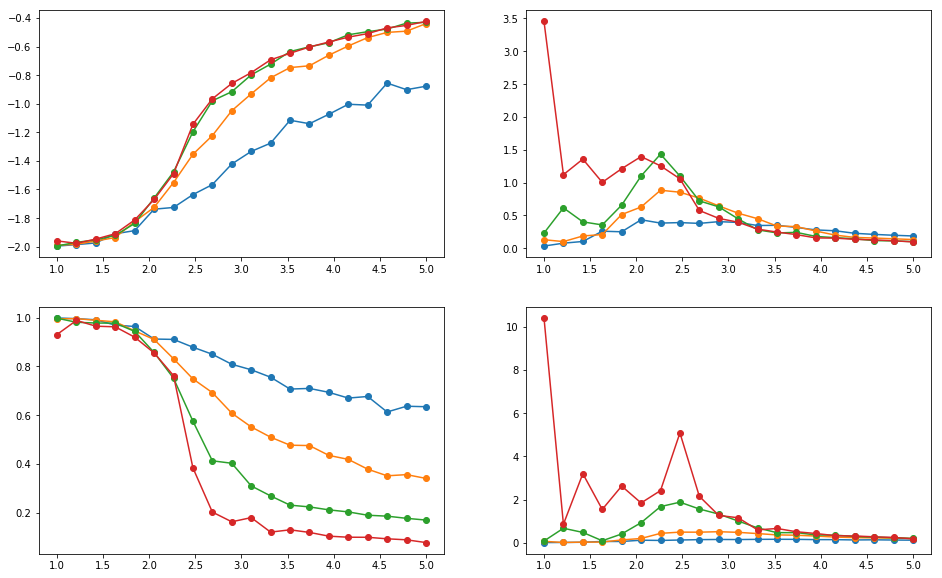

In [5]:
Ts = np.linspace(1.0, 5.0, 20)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for L in [2, 4, 8, 16]:
    Es = []
    Cs = []
    Ms = []
    chis = []
    for T in Ts:
        E, C, M, chi = Ising(L, T)
        Es.append(E)
        Cs.append(C)
        Ms.append(M)
        chis.append(chi)
    axes[0][0].plot(Ts, Es, 'o-', label="L={}".format(L))
    axes[0][1].plot(Ts, Cs, 'o-', label="L={}".format(L))
    axes[1][0].plot(Ts, Ms, 'o-', label="L={}".format(L))
    axes[1][1].plot(Ts, chis, 'o-', label="L={}".format(L))

In [23]:
def IsingMagnetGen(sz, T):
    
    steps = 1000
    spins = np.ones([sz, sz], int)
    N = sz*sz
    Ms = []
    
    for step in range(steps):
        for k in range(N):
            i = randint(sz)
            j = randint(sz)
            dE = DeltaEnergy(spins, i, j)
            if random() < exp(-dE/T):
                spins = FlipSpin(spins, i, j)
        Ms.append(Magnet(spins)/N)
        
    return Ms

(array([433.,  76.,  14.,   4.,   3.,   4.,  11.,  37., 128., 290.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 1 Patch objects>)

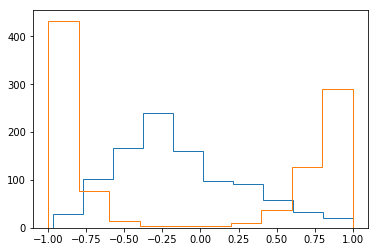

In [42]:
Ms_TLarge = IsingMagnetGen(8, 3.0)
Ms_TSmall = IsingMagnetGen(8, 2.2)
plt.hist(Ms_TLarge, histtype="step")
plt.hist(Ms_TSmall, histtype="step")